In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = "data/combined_thin.csv"
dfnew = pd.read_csv(file,low_memory=False)

In [4]:
df=dfnew.loc[dfnew['review_scores_rating']>0]

In [5]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Long term stays allowed,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Smoking allowed,Stove,Suitable for events,TV
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,0,0,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,0,1
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,0,0,0,0,0,0,0,0,0,1


In [6]:
bins = [0, 50, 100, 200 ,300, 9999]
group_names = ["<50", "50 to 100", "100 to 200", "200 to 300", ">300"]
df["review_count"] = pd.cut(df["number_of_reviews"], bins, labels=group_names)

C:\Users\jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
lst=[]
lst=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel', 'Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher', 'Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress', 'First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym',
       'Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed',
       'Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator', 'Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

lst1=['Accessible', 'BBQ grill', 'Baby friendly','Bathtub']
lst2=['Beachfront', 'Coffee maker','Elevator', 'Extra pillows and blankets' ]
lst3=['Game console','Garden or backyard','Heating', 'Indoor fireplace']
lst4=['Laptop friendly workspace','Private bathroom', 'Private entrance','Smoking allowed']

In [8]:
df1 = df[['review_count','review_scores_rating']].groupby('review_count').mean()
df1b=df1.rename(columns={'review_scores_rating': 'AverageRating'})

In [9]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['review_count','review_scores_rating']].groupby('review_count').mean()
    df1b=df1b.join(df2b.rename(columns={'review_scores_rating': each}), on='review_count',how='left')

In [10]:
df_chart = df1b.reset_index()
df_chart.head()

,review_count,AverageRating,Accessible,Air conditioning,BBQ grill,Baby friendly,Changing table,Bath towel,Bathtub,Beachfront,...,Long term stays allowed,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Smoking allowed,Stove,Suitable for events,TV
0,<50,94.061635,94.371913,94.215685,95.585366,96.020935,96.427746,95.0,95.416954,93.789474,...,94.484441,94.346552,95.933333,95.311848,94.902317,94.963874,92.398844,94.935440,93.233497,94.430009
1,50 to 100,94.021344,94.232975,94.000425,95.857143,95.639785,95.545455,NaN,95.159041,95.400000,...,94.396907,94.814493,97.384615,95.539941,95.390000,94.959381,93.553097,94.903073,93.971787,94.296583
2,100 to 200,94.171108,94.394052,93.959620,95.432432,95.989529,92.600000,NaN,95.453271,99.000000,...,95.000000,95.037500,96.200000,95.439883,95.850000,95.160448,93.832061,95.057692,94.713235,94.401643
3,200 to 300,94.491315,94.823529,94.255639,94.666667,96.096774,95.000000,NaN,95.925926,NaN,...,95.500000,95.550000,95.000000,95.476190,94.600000,94.886364,95.756757,95.133333,95.666667,94.538217
4,>300,94.821429,96.545455,93.875000,99.000000,97.500000,NaN,NaN,96.400000,NaN,...,NaN,94.166667,98.000000,96.363636,97.250000,96.538462,95.000000,95.600000,96.714286,94.829545


In [11]:
lstcolors=["lightskyblue","tan","plum","lightgreen","lightcoral","gold"]#["lightblue","green","lightskyblue","lightcoral","orange","red","purple","pink","yellowgreen"]
x = df_chart.index
y = df_chart['AverageRating']
ylabel = 'Average Rating'
xlabel = 'Review Count'
xmin =df_chart['AverageRating'].min()-(df_chart['AverageRating'].min()*.02)
xmax = 101
w=.17
width = 0.15
width1 = width
alpha =.99
alpha1=.99
lsz = 12
wsz = 8
title = 'Average Overal Rating vs Average Rating of Amenities by Review Count'

C:\Users\jeff\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


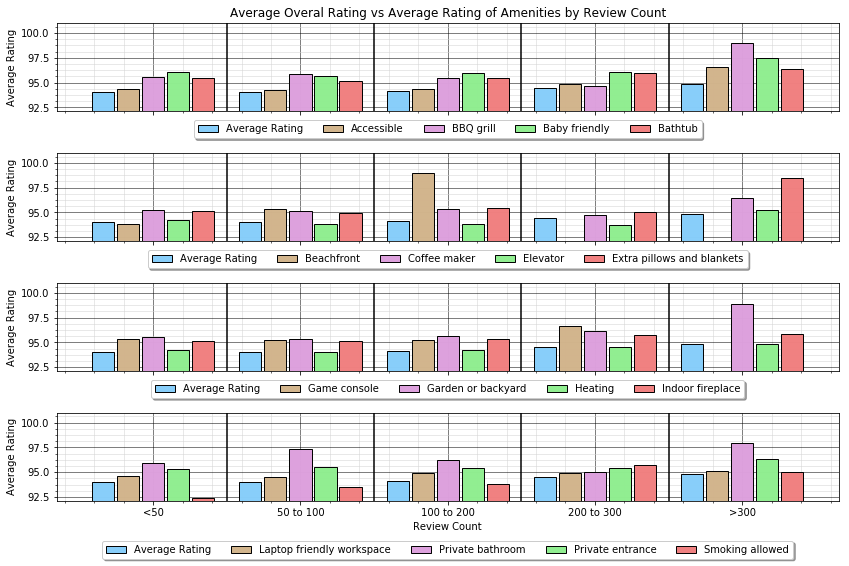

In [12]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(lsz,wsz))

ax1.bar(x-w-w, y,  alpha=alpha  ,color=lstcolors[0],width = width1,edgecolor = "black",linewidth=1)
ax1.bar(x-w, df_chart[lst1[0]],alpha=alpha1,color=lstcolors[1],width = width ,edgecolor = "black",linewidth=1)
ax1.bar(x, df_chart[lst1[1]],alpha=alpha1,color=lstcolors[2],width = width ,edgecolor = "black",linewidth=1)
ax1.bar(x+w, df_chart[lst1[2]],alpha=alpha1,color=lstcolors[3],width = width ,edgecolor = "black",linewidth=1)
ax1.bar(x+w+w, df_chart[lst1[3]],alpha=alpha1,color=lstcolors[4],width = width ,edgecolor = "black",linewidth=1)

ax2.bar(x-w-w, y,  alpha=alpha  ,color=lstcolors[0],width = width1,edgecolor = "black",linewidth=1)
ax2.bar(x-w, df_chart[lst2[0]],alpha=alpha1,color=lstcolors[1],width = width ,edgecolor = "black",linewidth=1)
ax2.bar(x, df_chart[lst2[1]],alpha=alpha1,color=lstcolors[2],width = width ,edgecolor = "black",linewidth=1)
ax2.bar(x+w, df_chart[lst2[2]],alpha=alpha1,color=lstcolors[3],width = width ,edgecolor = "black",linewidth=1)
ax2.bar(x+w+w, df_chart[lst2[3]],alpha=alpha1,color=lstcolors[4],width = width ,edgecolor = "black",linewidth=1)

ax3.bar(x-w-w, y,  alpha=alpha  ,color=lstcolors[0],width = width1,edgecolor = "black",linewidth=1)
ax3.bar(x-w, df_chart[lst3[0]],alpha=alpha1,color=lstcolors[1],width = width ,edgecolor = "black",linewidth=1)
ax3.bar(x, df_chart[lst3[1]],alpha=alpha1,color=lstcolors[2],width = width ,edgecolor = "black",linewidth=1)
ax3.bar(x+w, df_chart[lst3[2]],alpha=alpha1,color=lstcolors[3],width = width ,edgecolor = "black",linewidth=1)
ax3.bar(x+w+w, df_chart[lst3[3]],alpha=alpha1,color=lstcolors[4],width = width ,edgecolor = "black",linewidth=1)

ax4.bar(x-w-w, y,  alpha=alpha  ,color=lstcolors[0],width = width1,edgecolor = "black",linewidth=1)
ax4.bar(x-w, df_chart[lst4[0]],alpha=alpha1,color=lstcolors[1],width = width ,edgecolor = "black",linewidth=1)
ax4.bar(x, df_chart[lst4[1]],alpha=alpha1,color=lstcolors[2],width = width ,edgecolor = "black",linewidth=1)
ax4.bar(x+w, df_chart[lst4[2]],alpha=alpha1,color=lstcolors[3],width = width ,edgecolor = "black",linewidth=1)
ax4.bar(x+w+w, df_chart[lst4[3]],alpha=alpha1,color=lstcolors[4],width = width ,edgecolor = "black",linewidth=1)

plt.ylim(xmin,xmax)

ax1.legend([ylabel,lst1[0],lst1[1],lst1[2],lst1[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax2.legend([ylabel,lst2[0],lst2[1],lst2[2],lst2[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax3.legend([ylabel,lst3[0],lst3[1],lst3[2],lst3[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax4.legend([ylabel,lst4[0],lst4[1],lst4[2],lst4[3]],loc='upper center', bbox_to_anchor=(0.5, -0.4),fancybox=True, shadow=True, ncol=5)


ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels(("<50", "50 to 100", "100 to 200", "200 to 300", ">300"))

ax1.set_title(title)
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax3.set_ylabel(ylabel)
ax4.set_ylabel(ylabel)

ax4.set_xlabel(xlabel)

ax1.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax2.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax3.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax4.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax1.minorticks_on()
ax1.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax1.grid(which='major',  linewidth='0.5', color='black')
ax1.set_axisbelow(True)

ax2.minorticks_on()
ax2.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax2.grid(which='major',  linewidth='0.5', color='black')
ax2.set_axisbelow(True)

ax3.minorticks_on()
ax3.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax3.grid(which='major',  linewidth='0.5', color='black')
ax3.set_axisbelow(True)

ax4.minorticks_on()
ax4.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax4.grid(which='major',  linewidth='0.5', color='black')
ax4.set_axisbelow(True)

fig.tight_layout()
plt.savefig("Images/Chart1_final.png")
fig.show()